In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()
len(dataset)

--2023-04-05 12:06:49--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2023-04-05 12:06:49 (39.9 MB/s) - ‘insurance.csv’ saved [50264/50264]



1338

In [ ]:
dataset.head()

In [ ]:
df = dataset
df["sex"] = pd.factorize(df["sex"])[0]
df["region"] = pd.factorize(df["region"])[0]
df["smoker"] = pd.factorize(df["smoker"])[0]
dataset = df
dataset.head()

In [103]:
test_dataset = dataset.sample(frac=0.2)
len(test_dataset)

268

In [104]:
train_dataset = dataset[~dataset.isin(test_dataset)].dropna()
len(train_dataset)

1070

In [105]:
train_dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,0.0,27.9,0.0,0.0,0.0,16884.92
1,18.0,1.0,33.8,1.0,1.0,1.0,1725.55
2,28.0,1.0,33.0,3.0,1.0,1.0,4449.46
3,33.0,1.0,22.7,0.0,1.0,2.0,21984.47
4,32.0,1.0,28.9,0.0,1.0,2.0,3866.86


In [106]:
train_labels = train_dataset.pop("expenses")
train_labels.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [101]:
train_dataset.head()

,age,sex,bmi,children,smoker,region
0,19.0,0.0,27.9,0.0,0.0,0.0
1,18.0,1.0,33.8,1.0,1.0,1.0
3,33.0,1.0,22.7,0.0,1.0,2.0
4,32.0,1.0,28.9,0.0,1.0,2.0
5,31.0,0.0,25.7,0.0,1.0,1.0


In [107]:
test_labels = test_dataset.pop("expenses")
test_labels.head()

555     3847.67
586     3861.21
430    23082.96
666     8703.46
456    11881.97
Name: expenses, dtype: float64

In [108]:
test_dataset.head()

,age,sex,bmi,children,smoker,region
555,28,1,23.8,2,1,0
586,21,1,20.2,3,1,3
430,19,1,33.1,0,1,0
666,49,1,28.7,1,1,0
456,55,0,30.1,2,1,1


In [109]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(16),
    layers.Dense(4),
    layers.Dropout(.2),
    layers.Dense(1),
])

In [110]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_8 (Normalizat  (None, 6)                13        
 ion)                                                            
                                                                 
 dense_24 (Dense)            (None, 16)                112       
                                                                 
 dense_25 (Dense)            (None, 4)                 68        
                                                                 
 dropout_8 (Dropout)         (None, 4)                 0         
                                                                 
 dense_26 (Dense)            (None, 1)                 5         
                                                                 
Total params: 198
Trainable params: 185
Non-trainable params: 13
_______________________________________________________

In [111]:
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    validation_split=0.5,
    verbose=0, # disable logging
)

print(history)

9/9 - 0s - loss: 3332.2520 - mae: 3332.2520 - mse: 36813520.0000 - 37ms/epoch - 4ms/step
Testing set Mean Abs Error: 3332.25 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


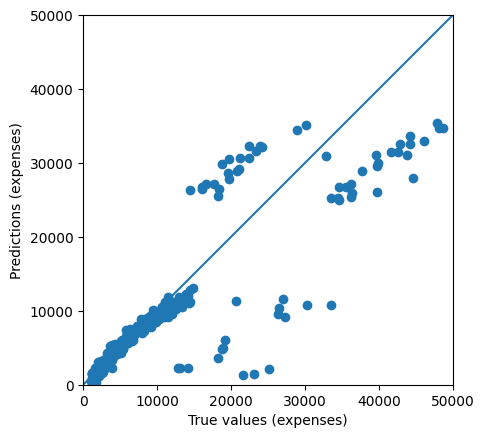

In [112]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
